# Mapping SNR to Eccentricity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

To be able to map between the relative SNR in each of the harmonics and the eccentricity of the system, we generate many sets of harmonics along the degeneracy line corresponding to the non-eccentric point found by quasi-circular parameter estimation.

We can then match these harmonics to an eccentric waveform at a fiducial point someway up this degeneracy line and record the relative SNRs.

## $\mathcal{M} = 24 M_\odot$

In [2]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data_48 = pickle.load(fp)

# Find min and max
chirp = list(grid_data_48.keys())[1]
for key in list(grid_data_48[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data_48[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data_48[chirp][key]), axis=1)
        grid_data_48[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data_48[chirp][key]), axis=1)

/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5398: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5399: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5402: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/home/ben.patterson/.conda/envs/eccentric_harmonics/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5404: ComplexWarning: Casting complex values to 

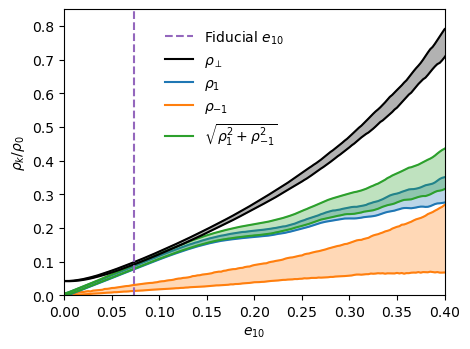

In [3]:
chirp = list(grid_data_48.keys())[1]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data_48[chirp]['h0_max']**2)/grid_data_48[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data_48[chirp]['h0_min']**2)/grid_data_48[chirp]['h0_min']
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], 
                 grid_data_48[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], 
                 grid_data_48[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], 
                 grid_data_48[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.25,0.50))
plt.xlim(0,0.4)
plt.ylim(0,0.85)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines.png', dpi=450, bbox_inches='tight')

## $\mathcal{M} = 10 M_\odot$

In [4]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data_48 = pickle.load(fp)

# Find min and max
chirp = list(grid_data_48.keys())[0]
for key in list(grid_data_48[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data_48[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data_48[chirp][key]), axis=1)
        grid_data_48[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data_48[chirp][key]), axis=1)

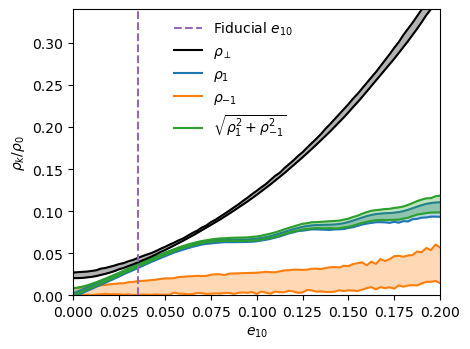

In [5]:
chirp = list(grid_data_48.keys())[0]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data_48[chirp]['h0_max']**2)/grid_data_48[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data_48[chirp]['h0_min']**2)/grid_data_48[chirp]['h0_min']
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], 
                 grid_data_48[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], 
                 grid_data_48[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], 
                 grid_data_48[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.26,0.53))
plt.xlim(0,0.2)
plt.ylim(0,0.34)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines_10msun.png', dpi=450, bbox_inches='tight')

## $\mathcal{M} = 40 M_\odot$

In [6]:
with open(os.path.join('grid_data', 'all_matches'), 'rb') as fp:
        grid_data_48 = pickle.load(fp)

# Find min and max
chirp = list(grid_data_48.keys())[2]
for key in list(grid_data_48[chirp].keys()):
    if key not in ['fid_params', 'e_vals', 'ovlps', 'ovlps_perp'] and 'phase' not in key:
        grid_data_48[chirp][f'{key}_max'] = np.nanmax(np.array(grid_data_48[chirp][key]), axis=1)
        grid_data_48[chirp][f'{key}_min'] = np.nanmin(np.array(grid_data_48[chirp][key]), axis=1)

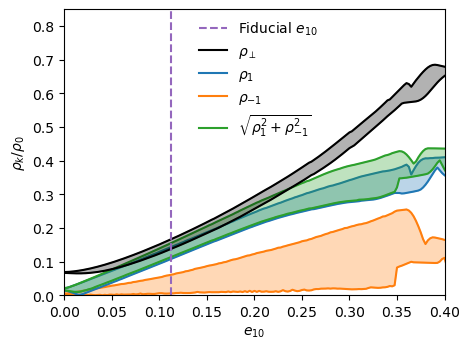

In [7]:
chirp = list(grid_data_48.keys())[2]

# Plot for each combination
plt.figure(figsize=(0.75*6.4, 0.75*4.8))
fid_e = chirp**(5/6)*0.035/(10**(5/6))
plt.axvline(fid_e, ls='dashed', c='C4', zorder=5/5, label='Fiducial $e_{10}$')
high_harm_min = np.sqrt(1-grid_data_48[chirp]['h0_max']**2)/grid_data_48[chirp]['h0_max']
high_harm_max = np.sqrt(1-grid_data_48[chirp]['h0_min']**2)/grid_data_48[chirp]['h0_min']
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_max, c='k', zorder=4/5, label='$\\rho_{\\perp}$')
plt.plot(grid_data_48[chirp]['e_vals'], high_harm_min, c='k', zorder=4/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], high_harm_min, high_harm_max, color='k', zorder=4/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_max'], c='C0', zorder=2/5, label='$\\rho_1$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], c='C0', zorder=2/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h0_min'], 
                 grid_data_48[chirp]['h1_h0_max'], color='C0', zorder=2/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_max'], c='C1', zorder=1/5, label='$\\rho_{-1}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], c='C1', zorder=1/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h-1_h0_min'], 
                 grid_data_48[chirp]['h-1_h0_max'], color='C1', zorder=1/5, alpha=0.3)
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_max'], c='C2', zorder=3/5, label='$\\sqrt{\\rho_1^2+\\rho_{-1}^2}$')
plt.plot(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], c='C2', zorder=3/5)
plt.fill_between(grid_data_48[chirp]['e_vals'], grid_data_48[chirp]['h1_h-1_h0_min'], 
                 grid_data_48[chirp]['h1_h-1_h0_max'], color='C2', zorder=3/5, alpha=0.3)
plt.legend(frameon=False, loc=(0.34,0.53))
plt.xlim(0,0.4)
plt.ylim(0,0.85)
plt.xlabel('$e_{10}$')
plt.ylabel('$\\rho_k$/$\\rho_0$')
plt.tight_layout()
plt.savefig('Figures/min_max_lines_40msun.png', dpi=450, bbox_inches='tight')